# Employee Attrition Prediction -  Advanced Analysis

In [9]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#To display whole dataset
pd.set_option("display.max.columns",None)
pd.set_option("display.max.rows",None)

#To overcome warnings
import warnings
warnings.filterwarnings("ignore")

In [10]:
# Import data set
df_full = pd.read_csv("pls_df.csv")

In [11]:
df_full.shape

(1470, 47)

In [12]:
df_full.head()

,DailyRate,MonthlyIncome,HourlyRate,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,YearsWithCurrManagerGroup_2-5 years,YearsWithCurrManagerGroup_5-10 years,YearsWithCurrManagerGroup_10+ years,YearsSinceLastPromotionGroup_2-5 years,YearsSinceLastPromotionGroup_5-10 years,YearsSinceLastPromotionGroup_10+ years,YearsInCurrentRoleGroup_2-5 years,YearsInCurrentRoleGroup_5-10 years,YearsInCurrentRoleGroup_10+ years,NumCompaniesWorkedGroup_2-3 companies,NumCompaniesWorkedGroup_4-5 companies,NumCompaniesWorkedGroup_5+ companies,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance,YearsAtCompany
0,0.715820,0.262454,0.914286,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,1,41,1,2,3,2,4,3,1,1,6
1,0.126700,0.217009,0.442857,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,49,8,3,2,2,2,4,4,3,10
2,0.909807,0.056925,0.885714,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,37,2,4,2,1,3,3,2,3,0
3,0.923407,0.100053,0.371429,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,33,3,4,3,1,3,3,3,3,8
4,0.350036,0.129489,0.142857,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,27,2,1,3,1,2,3,4,3,2


### 3. Train-test-Split

In [13]:
from sklearn.model_selection import train_test_split
X = df_full.drop(columns=['Attrition_Yes'])
y = df_full['Attrition_Yes']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)




## Fitting Model with default parameters(not tuned) and Compare evaluation metrics -  with all variables


In [14]:
# Set the decimal format
pd.options.display.float_format = "{:.2f}".format

In [15]:
# libraries
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OneHotEncoder

In [18]:
models = {
    'Multiple Logistic': LogisticRegression(solver='liblinear'),
    'Ridge': LogisticRegression(penalty='l2', C=1.0),
    'Lasso': LogisticRegression(penalty='l1', C=1, solver='liblinear'),
    'Elastic-net':LogisticRegression(penalty='elasticnet', l1_ratio=0.5, C=1, solver='saga'),
    'Random Forest': RandomForestClassifier(),
    'GausianNB': GaussianNB(),
    'XGBoost': XGBClassifier()
}

In [19]:
for name, model in models.items():
    print(name)
    print('=' * len(name))

    # Fit the model on the encoded data
    model.fit(X_train, y_train)

     # Training set
    train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_pred)
    train_err = 1 - train_acc
    train_f1 = f1_score(y_train, train_pred, average='weighted')
    train_cm = confusion_matrix(y_train, train_pred)
    train_sensitivity = train_cm[1, 1] / (train_cm[1, 1] + train_cm[1, 0])
    train_specificity = train_cm[0, 0] / (train_cm[0, 0] + train_cm[0, 1])


    # Test set
    test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)
    test_err = 1 - test_acc
    test_f1 = f1_score(y_test, test_pred, average='weighted')
    test_cm = confusion_matrix(y_test, test_pred)
    test_sensitivity = test_cm[1, 1] / (test_cm[1, 1] + test_cm[1, 0])
    test_specificity = test_cm[0, 0] / (test_cm[0, 0] + test_cm[0, 1])


    print(f'Training Accuracy: {train_acc:.4f}')
    print(f'Training Error Rate: {train_err:.4f}')
    print(f'Training F1 Score: {train_f1:.4f}')
    print(f'Training Confusion Matrix:\n{train_cm}')
    print("Training sensitivity: ", train_sensitivity)
    print("Training specificity: ", train_specificity)
    print('\n')
    print(f'Test Accuracy: {test_acc:.4f}')
    print(f'Test Error Rate: {test_err:.4f}')
    print(f'Test F1 Score: {test_f1:.4f}')
    print(f'Test Confusion Matrix:\n{test_cm}')
    print("Test sensitivity: ", test_sensitivity)
    print("Test specificity: ", test_specificity)

    print('\n\n')


Multiple Logistic
Training Accuracy: 0.8950
Training Error Rate: 0.1050
Training F1 Score: 0.8820
Training Confusion Matrix:
[[839  14]
 [ 94  82]]
Training sensitivity:  0.4659090909090909
Training specificity:  0.9835873388042204


Test Accuracy: 0.8594
Test Error Rate: 0.1406
Test F1 Score: 0.8474
Test Confusion Matrix:
[[359  21]
 [ 41  20]]
Test sensitivity:  0.32786885245901637
Test specificity:  0.9447368421052632



Ridge
=====
Training Accuracy: 0.8941
Training Error Rate: 0.1059
Training F1 Score: 0.8811
Training Confusion Matrix:
[[838  15]
 [ 94  82]]
Training sensitivity:  0.4659090909090909
Training specificity:  0.9824150058616647


Test Accuracy: 0.8549
Test Error Rate: 0.1451
Test F1 Score: 0.8393
Test Confusion Matrix:
[[360  20]
 [ 44  17]]
Test sensitivity:  0.2786885245901639
Test specificity:  0.9473684210526315



Lasso
=====
Training Accuracy: 0.8931
Training Error Rate: 0.1069
Training F1 Score: 0.8807
Training Confusion Matrix:
[[836  17]
 [ 93  83]]
Training 

Random forest and Xgboost are having High acccuracies with train set but test set they have low accuracies . So it is a sign of overfitting.

## Fit Random forest and Xgboost again with some hyper parameter tuning -  Using grid search with cross validation

In [29]:
from sklearn.model_selection import GridSearchCV

In [33]:
models = {
    'Random Forest': RandomForestClassifier(random_state = 42),
    'XGBoost': XGBClassifier(random_state=42)
}

In [34]:
for name, model in models.items():
    print(name)
    print('=' * len(name))

    if name == 'XGBoost':
        param_grid = {
            'max_depth': [3, 5, 7],
            'learning_rate': [0.1, 0.01, 0.001],
            'n_estimators': [100, 200, 300]
        }
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
        grid_search.fit(X_train_new,y_train)
        best_model = grid_search.best_estimator_
        model = best_model
        print(best_model)

    if name == 'Random Forest':
        param_grid = {
            'min_samples_split': [2, 5, 10],
            'max_depth': [None, 10, 20],
            'n_estimators': [50, 100, 200]
        }
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
        grid_search.fit(X_train_new,y_train)
        best_model = grid_search.best_estimator_
        model = best_model
        print(best_model)

   # Fit the model on the encoded data
    model.fit(X_train_new, y_train)

     # Training set
    train_pred = model.predict(X_train_new)
    train_acc = accuracy_score(y_train, train_pred)
    train_err = 1 - train_acc
    train_f1 = f1_score(y_train, train_pred, average='weighted')
    train_cm = confusion_matrix(y_train, train_pred)
    train_sensitivity = train_cm[1, 1] / (train_cm[1, 1] + train_cm[1, 0])
    train_specificity = train_cm[0, 0] / (train_cm[0, 0] + train_cm[0, 1])


    # Test set
    test_pred = model.predict(X_test_new)
    test_acc = accuracy_score(y_test, test_pred)
    test_err = 1 - test_acc
    test_f1 = f1_score(y_test, test_pred, average='weighted')
    test_cm = confusion_matrix(y_test, test_pred)
    test_sensitivity = test_cm[1, 1] / (test_cm[1, 1] + test_cm[1, 0])
    test_specificity = test_cm[0, 0] / (test_cm[0, 0] + test_cm[0, 1])


    print(f'Training Accuracy: {train_acc:.4f}')
    print(f'Training Error Rate: {train_err:.4f}')
    print(f'Training F1 Score: {train_f1:.4f}')
    print(f'Training Confusion Matrix:\n{train_cm}')
    print("Training sensitivity: ", train_sensitivity)
    print("Training specificity: ", train_specificity)
    print('\n')
    print(f'Test Accuracy: {test_acc:.4f}')
    print(f'Test Error Rate: {test_err:.4f}')
    print(f'Test F1 Score: {test_f1:.4f}')
    print(f'Test Confusion Matrix:\n{test_cm}')
    print("Test sensitivity: ", test_sensitivity)
    print("Test specificity: ", test_specificity)

    print('\n\n')

Random Forest
RandomForestClassifier(min_samples_split=10, n_estimators=200, random_state=42)
Training Accuracy: 0.9125
Training Error Rate: 0.0875
Training F1 Score: 0.9005
Training Confusion Matrix:
[[851   2]
 [ 88  88]]
Training sensitivity:  0.5
Training specificity:  0.9976553341148886


Test Accuracy: 0.8639
Test Error Rate: 0.1361
Test F1 Score: 0.8239
Test Confusion Matrix:
[[374   6]
 [ 54   7]]
Test sensitivity:  0.11475409836065574
Test specificity:  0.9842105263157894



XGBoost
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_d

* Now both models are looking good and both of them have high accuracy and F1 score and overfitting was reduced (Eval metrics are come closer for both training and testing data sets)

* But Theoritically Xgboost has a higher chance to overfit than the Random forest we selct Tuned Random forest as our Final ML model to predict Employee attrition

### Handle Imbalnceness and try to increase prediction accuracy and validity of our Final RF model

In [20]:
from sklearn.metrics import accuracy_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from collections import defaultdict

# Define the Random Forest classifier with min_samples_split=4
rf_classifier = RandomForestClassifier(min_samples_split=10, n_estimators=200, random_state=42)

# Create dictionaries to store results for each technique
results_train = defaultdict(list)
results_test = defaultdict(list)

# Define the balancing techniques
techniques = {
    "No Balancing": None,
    "SMOTE": SMOTE(sampling_strategy='auto', random_state=42),
    "Random Under-sampling": RandomUnderSampler(sampling_strategy='auto', random_state=42),
    "SMOTE + Random Under-sampling (SMOTEENN)": SMOTEENN(sampling_strategy='auto', random_state=42)
}

# Loop through each balancing technique
for technique_name, technique in techniques.items():
    # If the technique is None (No Balancing), fit the classifier directly
    if technique is None:
        rf_classifier.fit(X_train, y_train)
    else:
        # Apply the balancing technique to the training data
        X_train_balanced, y_train_balanced = technique.fit_resample(X_train, y_train)
        rf_classifier.fit(X_train_balanced, y_train_balanced)

    # Make predictions on training and test sets
    y_train_pred = rf_classifier.predict(X_train)
    y_test_pred = rf_classifier.predict(X_test)

    # Calculate accuracy and F1-score for training and test sets
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    f1_train = f1_score(y_train, y_train_pred,average='weighted')
    f1_test = f1_score(y_test, y_test_pred,average='weighted')

    # Store the results in dictionaries
    results_train["Balancing Technique"].append(technique_name)
    results_train["Accuracy"].append(accuracy_train)
    results_train["F1-Score"].append(f1_train)

    results_test["Balancing Technique"].append(technique_name)
    results_test["Accuracy"].append(accuracy_test)
    results_test["F1-Score"].append(f1_test)

# Convert the results to DataFrames
results_train_df = pd.DataFrame(results_train)
results_test_df = pd.DataFrame(results_test)

# Display the results for both training and test sets
print("Training Set Results:")
print(results_train_df)
print("\nTest Set Results:")
print(results_test_df)


Training Set Results:
                        Balancing Technique  Accuracy  F1-Score
0                              No Balancing      0.92      0.92
1                                     SMOTE      0.96      0.96
2                     Random Under-sampling      0.83      0.85
3  SMOTE + Random Under-sampling (SMOTEENN)      0.90      0.90

Test Set Results:
                        Balancing Technique  Accuracy  F1-Score
0                              No Balancing      0.86      0.81
1                                     SMOTE      0.85      0.83
2                     Random Under-sampling      0.76      0.79
3  SMOTE + Random Under-sampling (SMOTEENN)      0.77      0.79


* Model with Imbalanced Data set is performed well than the other models

### Comparing Balancing Techniques

In [22]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, f1_score

# Define models
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(solver='liblinear'),
    'Ridge Logistic Regression': LogisticRegression(penalty='l2', C=1.0),
    'Lasso Logistic Regression':  LogisticRegression(penalty='l1', C=1, solver='liblinear'),
    'Gaussian Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier()
}

# Define resampling techniques
resampling_techniques = {
    'SMOTE': SMOTE(),
    'Random Under Sampler': RandomUnderSampler(),
    'Random Over Sampler': RandomOverSampler()
}

# Loop through models and resampling techniques
for model_name, model in models.items():
    for resampling_name, resampling in resampling_techniques.items():
        print(f"\nModel: {model_name}, Resampling: {resampling_name}")

        # Apply resampling
        X_resampled, y_resampled = resampling.fit_resample(X_train, y_train)

        # Fit the model
        model.fit(X_resampled, y_resampled)

        # Make predictions on train and test sets
        train_predictions = model.predict(X_resampled)
        test_predictions = model.predict(X_test)

        # Calculate and print accuracy and F1 score for train and test sets
        train_accuracy = accuracy_score(y_resampled, train_predictions)
        train_f1_score = f1_score(y_resampled, train_predictions)
        print(f"Train Accuracy: {train_accuracy:.4f}, Train F1 Score: {train_f1_score:.4f}")

        test_accuracy = accuracy_score(y_test, test_predictions)
        test_f1_score = f1_score(y_test, test_predictions)
        print(f"Test Accuracy: {test_accuracy:.4f}, Test F1 Score: {test_f1_score:.4f}")



Model: Random Forest, Resampling: SMOTE
Train Accuracy: 1.0000, Train F1 Score: 1.0000
Test Accuracy: 0.8413, Test F1 Score: 0.2391

Model: Random Forest, Resampling: Random Under Sampler
Train Accuracy: 1.0000, Train F1 Score: 1.0000
Test Accuracy: 0.7732, Test F1 Score: 0.4444

Model: Random Forest, Resampling: Random Over Sampler
Train Accuracy: 1.0000, Train F1 Score: 1.0000
Test Accuracy: 0.8662, Test F1 Score: 0.3059

Model: Logistic Regression, Resampling: SMOTE
Train Accuracy: 0.9056, Train F1 Score: 0.9024
Test Accuracy: 0.8458, Test F1 Score: 0.4333

Model: Logistic Regression, Resampling: Random Under Sampler
Train Accuracy: 0.8210, Train F1 Score: 0.8205
Test Accuracy: 0.7279, Test F1 Score: 0.4393

Model: Logistic Regression, Resampling: Random Over Sampler
Train Accuracy: 0.8118, Train F1 Score: 0.8143
Test Accuracy: 0.7596, Test F1 Score: 0.4301

Model: Ridge Logistic Regression, Resampling: SMOTE
Train Accuracy: 0.8951, Train F1 Score: 0.8917
Test Accuracy: 0.8345, Tes

### Logistic model with important features

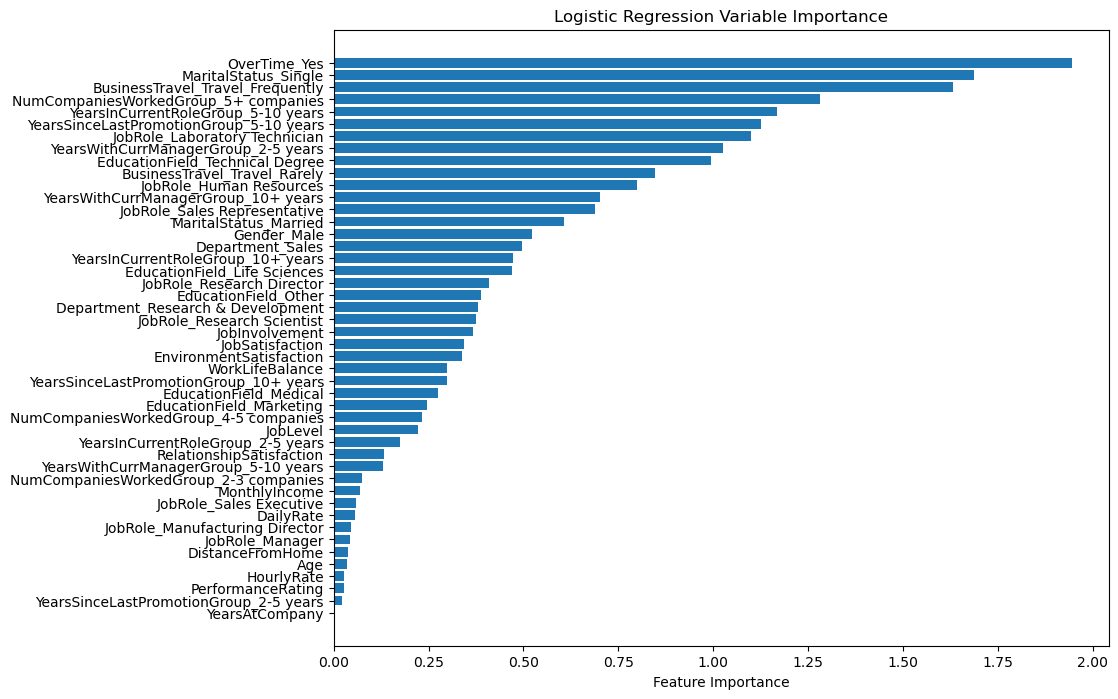


Logistic Regression with Top 5 Important Features:
Train Accuracy: 0.8435, Train F1 Score: 0.7972
Test Accuracy: 0.8458, Test F1 Score: 0.8004

Logistic Regression with Top 10 Important Features:
Train Accuracy: 0.8523, Train F1 Score: 0.8240
Test Accuracy: 0.8345, Test F1 Score: 0.8117

Logistic Regression with Top 15 Important Features:
Train Accuracy: 0.8620, Train F1 Score: 0.8377
Test Accuracy: 0.8413, Test F1 Score: 0.8204


In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt


# Fit a Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Get feature importance and plot
feature_importance = logistic_model.coef_[0]
sorted_idx = np.argsort(np.abs(feature_importance))

# Plotting variable importance
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), np.abs(feature_importance[sorted_idx]))
plt.yticks(range(len(sorted_idx)), X_train.columns[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Logistic Regression Variable Importance')
plt.show()

# Get top 5, 10, and 15 important features
top5_features = X_train.columns[sorted_idx][-5:]
top10_features = X_train.columns[sorted_idx][-10:]
top15_features = X_train.columns[sorted_idx][-15:]

# Function to fit Logistic Regression with selected features and calculate metrics
def fit_and_evaluate(X_train, X_test, y_train, y_test, selected_features):
    # Subset the data with selected features
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    # Fit Logistic Regression model
    logistic_model.fit(X_train_selected, y_train)

    # Make predictions on train and test sets
    train_predictions = logistic_model.predict(X_train_selected)
    test_predictions = logistic_model.predict(X_test_selected)

    # Calculate and print accuracy and F1 score for train and test sets
    train_accuracy = accuracy_score(y_train, train_predictions)
    train_f1_score = f1_score(y_train, train_predictions,average='weighted')
    print(f"Train Accuracy: {train_accuracy:.4f}, Train F1 Score: {train_f1_score:.4f}")

    test_accuracy = accuracy_score(y_test, test_predictions)
    test_f1_score = f1_score(y_test, test_predictions,average='weighted')
    print(f"Test Accuracy: {test_accuracy:.4f}, Test F1 Score: {test_f1_score:.4f}")

# Fit Logistic Regression with top 5 important features
print("\nLogistic Regression with Top 5 Important Features:")
fit_and_evaluate(X_train, X_test, y_train, y_test, top5_features)

# Fit Logistic Regression with top 10 important features
print("\nLogistic Regression with Top 10 Important Features:")
fit_and_evaluate(X_train, X_test, y_train, y_test, top10_features)

# Fit Logistic Regression with top 15 important features
print("\nLogistic Regression with Top 15 Important Features:")
fit_and_evaluate(X_train, X_test, y_train, y_test, top15_features)


### Random forest with most importance features

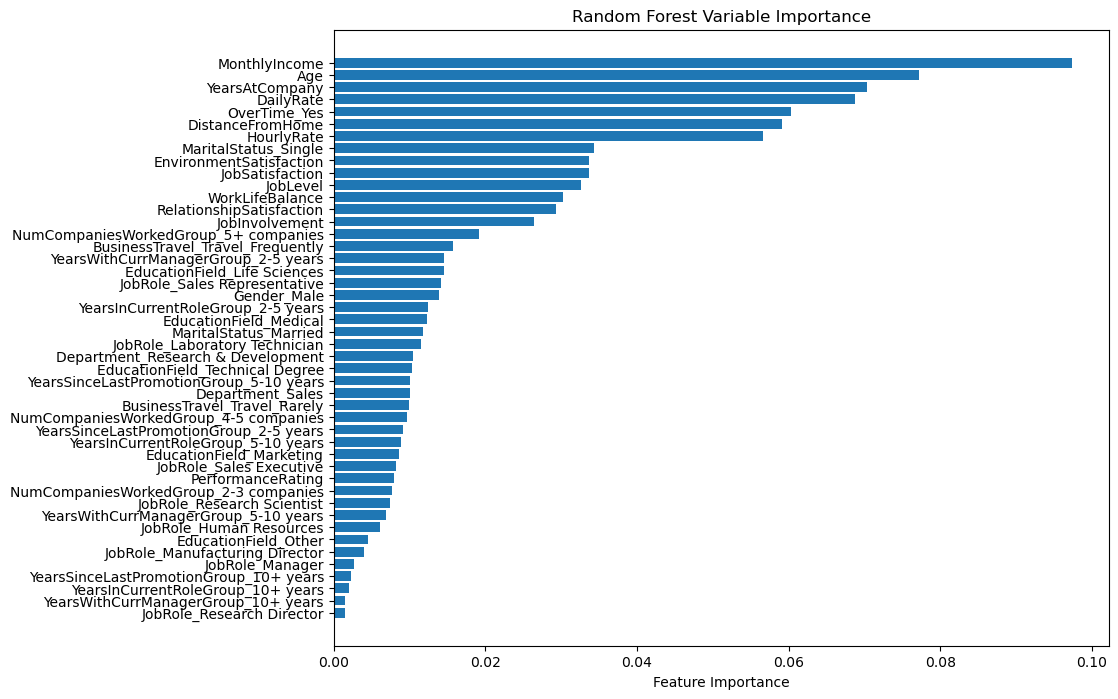


Random Forest with Top 5 Important Features:
Train Accuracy: 1.0000, Train F1 Score: 1.0000
Test Accuracy: 0.8617, Test F1 Score: 0.8302

Random Forest with Top 10 Important Features:
Train Accuracy: 1.0000, Train F1 Score: 1.0000
Test Accuracy: 0.8571, Test F1 Score: 0.8221

Random Forest with Top 15 Important Features:
Train Accuracy: 1.0000, Train F1 Score: 1.0000
Test Accuracy: 0.8685, Test F1 Score: 0.8297


In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# Fit a Random Forest model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

# Get feature importance and plot
feature_importance = random_forest_model.feature_importances_
sorted_idx = np.argsort(feature_importance)

# Plotting variable importance
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), X_train.columns[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Random Forest Variable Importance')
plt.show()

# Get top 5, 10, and 15 important features
top5_features = X_train.columns[sorted_idx][-5:]
top10_features = X_train.columns[sorted_idx][-10:]
top15_features = X_train.columns[sorted_idx][-15:]

# Function to fit Random Forest with selected features and calculate metrics
def fit_and_evaluate_rf(X_train, X_test, y_train, y_test, selected_features):
    # Subset the data with selected features
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    # Fit Random Forest model
    random_forest_model.fit(X_train_selected, y_train)

    # Make predictions on train and test sets
    train_predictions = random_forest_model.predict(X_train_selected)
    test_predictions = random_forest_model.predict(X_test_selected)

    # Calculate and print accuracy and F1 score for train and test sets
    train_accuracy = accuracy_score(y_train, train_predictions)
    train_f1_score = f1_score(y_train, train_predictions,average='weighted')
    print(f"Train Accuracy: {train_accuracy:.4f}, Train F1 Score: {train_f1_score:.4f}")

    test_accuracy = accuracy_score(y_test, test_predictions)
    test_f1_score = f1_score(y_test, test_predictions,average='weighted')
    print(f"Test Accuracy: {test_accuracy:.4f}, Test F1 Score: {test_f1_score:.4f}")

# Fit Random Forest with top 5 important features
print("\nRandom Forest with Top 5 Important Features:")
fit_and_evaluate_rf(X_train, X_test, y_train, y_test, top5_features)

# Fit Random Forest with top 10 important features
print("\nRandom Forest with Top 10 Important Features:")
fit_and_evaluate_rf(X_train, X_test, y_train, y_test, top10_features)

# Fit Random Forest with top 15 important features
print("\nRandom Forest with Top 15 Important Features:")
fit_and_evaluate_rf(X_train, X_test, y_train, y_test, top15_features)


### Xgboost with impotant features

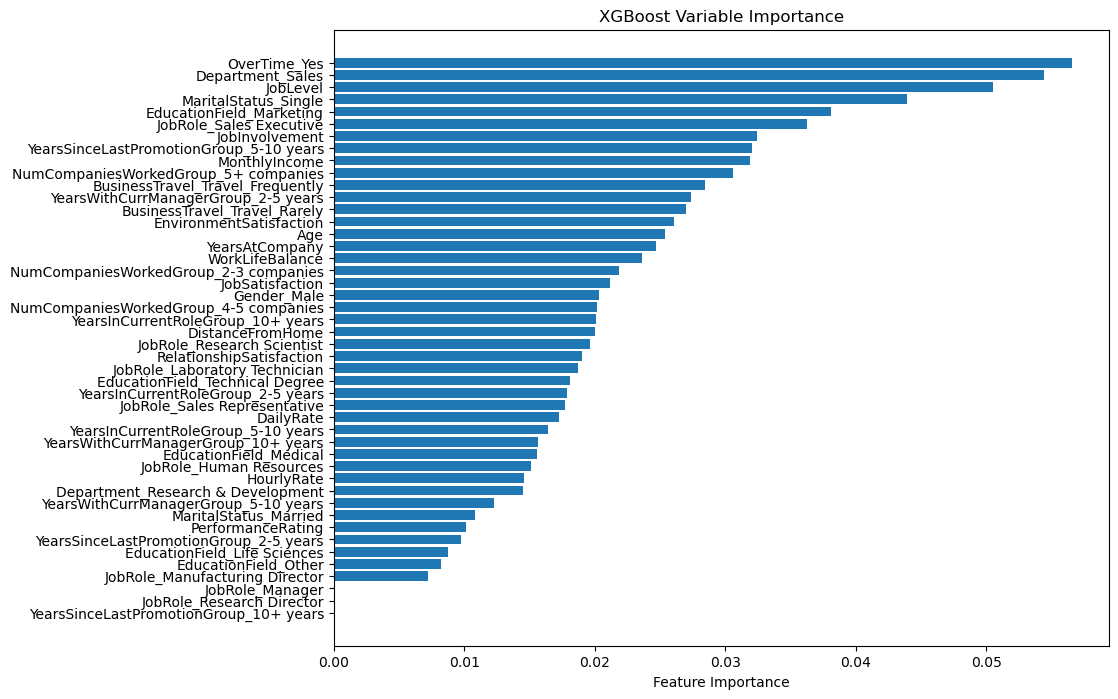


XGBoost with Top 5 Important Features:
Train Accuracy: 0.8571, Train F1 Score: 0.8324
Test Accuracy: 0.8594, Test F1 Score: 0.8209

XGBoost with Top 10 Important Features:
Train Accuracy: 0.9708, Train F1 Score: 0.9698
Test Accuracy: 0.8277, Test F1 Score: 0.8130

XGBoost with Top 15 Important Features:
Train Accuracy: 1.0000, Train F1 Score: 1.0000
Test Accuracy: 0.8458, Test F1 Score: 0.8256


In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt


# Fit an XGBoost model
xgboost_model = XGBClassifier()
xgboost_model.fit(X_train, y_train)

# Get feature importance and plot
feature_importance = xgboost_model.feature_importances_
sorted_idx = np.argsort(feature_importance)

# Plotting variable importance
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), X_train.columns[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('XGBoost Variable Importance')
plt.show()

# Get top 5, 10, and 15 important features
top5_features = X_train.columns[sorted_idx][-5:]
top10_features = X_train.columns[sorted_idx][-10:]
top15_features = X_train.columns[sorted_idx][-15:]

# Function to fit XGBoost with selected features and calculate metrics
def fit_and_evaluate_xgboost(X_train, X_test, y_train, y_test, selected_features):
    # Subset the data with selected features
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    # Fit XGBoost model
    xgboost_model.fit(X_train_selected, y_train)

    # Make predictions on train and test sets
    train_predictions = xgboost_model.predict(X_train_selected)
    test_predictions = xgboost_model.predict(X_test_selected)

    # Calculate and print accuracy and F1 score for train and test sets
    train_accuracy = accuracy_score(y_train, train_predictions)
    train_f1_score = f1_score(y_train, train_predictions,average='weighted')
    print(f"Train Accuracy: {train_accuracy:.4f}, Train F1 Score: {train_f1_score:.4f}")

    test_accuracy = accuracy_score(y_test, test_predictions)
    test_f1_score = f1_score(y_test, test_predictions,average='weighted')
    print(f"Test Accuracy: {test_accuracy:.4f}, Test F1 Score: {test_f1_score:.4f}")

# Fit XGBoost with top 5 important features
print("\nXGBoost with Top 5 Important Features:")
fit_and_evaluate_xgboost(X_train, X_test, y_train, y_test, top5_features)

# Fit XGBoost with top 10 important features
print("\nXGBoost with Top 10 Important Features:")
fit_and_evaluate_xgboost(X_train, X_test, y_train, y_test, top10_features)

# Fit XGBoost with top 15 important features
print("\nXGBoost with Top 15 Important Features:")
fit_and_evaluate_xgboost(X_train, X_test, y_train, y_test, top15_features)


### Model with top 5 vars with hyper parameter tuning

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, f1_score
from imblearn.over_sampling import SMOTE


# Feature selection using Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
sfm = SelectFromModel(logistic_model, max_features=5)
X_train_logistic = sfm.fit_transform(X_train, y_train)
X_test_logistic = sfm.transform(X_test)

# Hyperparameter tuning for Logistic Regression
param_grid_logistic = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search_logistic = GridSearchCV(LogisticRegression(), param_grid_logistic, cv=5, scoring='f1')
grid_search_logistic.fit(X_train_logistic, y_train)
best_params_logistic = grid_search_logistic.best_params_

# Fit Logistic Regression with optimal parameters
logistic_model_optimal = LogisticRegression(**best_params_logistic)
logistic_model_optimal.fit(X_train_logistic, y_train)

# Make predictions on train and test sets
train_predictions_logistic = logistic_model_optimal.predict(X_train_logistic)
test_predictions_logistic = logistic_model_optimal.predict(X_test_logistic)

# Calculate and print accuracy and F1 score for Logistic Regression
train_accuracy_logistic = accuracy_score(y_train, train_predictions_logistic)
train_f1_score_logistic = f1_score(y_train, train_predictions_logistic,average='weighted')
print("Logistic Regression:")
print(f"Train Accuracy: {train_accuracy_logistic:.4f}, Train F1 Score: {train_f1_score_logistic:.4f}")

test_accuracy_logistic = accuracy_score(y_test, test_predictions_logistic)
test_f1_score_logistic = f1_score(y_test, test_predictions_logistic,average='weighted')
print(f"Test Accuracy: {test_accuracy_logistic:.4f}, Test F1 Score: {test_f1_score_logistic:.4f}")


# Feature selection using Random Forest
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
sfm = SelectFromModel(random_forest_model, max_features=5)
X_train_rf = sfm.fit_transform(X_train, y_train)
X_test_rf = sfm.transform(X_test)

# Hyperparameter tuning for Random Forest
param_grid_rf = {'n_estimators': [50, 100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='f1')
grid_search_rf.fit(X_train_rf, y_train)
best_params_rf = grid_search_rf.best_params_

# Fit Random Forest with optimal parameters
random_forest_model_optimal = RandomForestClassifier(**best_params_rf)
random_forest_model_optimal.fit(X_train_rf, y_train)

# Make predictions on train and test sets
train_predictions_rf = random_forest_model_optimal.predict(X_train_rf)
test_predictions_rf = random_forest_model_optimal.predict(X_test_rf)

# Calculate and print accuracy and F1 score for Random Forest
train_accuracy_rf = accuracy_score(y_train, train_predictions_rf)
train_f1_score_rf = f1_score(y_train, train_predictions_rf,average='weighted')
print("\nRandom Forest:")
print(f"Train Accuracy: {train_accuracy_rf:.4f}, Train F1 Score: {train_f1_score_rf:.4f}")

test_accuracy_rf = accuracy_score(y_test, test_predictions_rf)
test_f1_score_rf = f1_score(y_test, test_predictions_rf,average='weighted')
print(f"Test Accuracy: {test_accuracy_rf:.4f}, Test F1 Score: {test_f1_score_rf:.4f}")


# Feature selection using XGBoost
xgboost_model = XGBClassifier()
xgboost_model.fit(X_train, y_train)
sfm = SelectFromModel(xgboost_model, max_features=5)
X_train_xgboost = sfm.fit_transform(X_train, y_train)
X_test_xgboost = sfm.transform(X_test)

# Hyperparameter tuning for XGBoost
param_grid_xgboost = {'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3], 'n_estimators': [50, 100, 200, 300],
                      'max_depth': [3, 5, 7, 10], 'min_child_weight': [1, 3, 5]}
grid_search_xgboost = GridSearchCV(XGBClassifier(), param_grid_xgboost, cv=5, scoring='f1')
grid_search_xgboost.fit(X_train_xgboost, y_train)
best_params_xgboost = grid_search_xgboost.best_params_

# Fit XGBoost with optimal parameters
xgboost_model_optimal = XGBClassifier(**best_params_xgboost)
xgboost_model_optimal.fit(X_train_xgboost, y_train)

# Make predictions on train and test sets
train_predictions_xgboost = xgboost_model_optimal.predict(X_train_xgboost)
test_predictions_xgboost = xgboost_model_optimal.predict(X_test_xgboost)

# Calculate and print accuracy and F1 score for XGBoost
train_accuracy_xgboost = accuracy_score(y_train, train_predictions_xgboost)
train_f1_score_xgboost = f1_score(y_train, train_predictions_xgboost,average='weighted')
print("\nXGBoost:")
print(f"Train Accuracy: {train_accuracy_xgboost:.4f}, Train F1 Score: {train_f1_score_xgboost:.4f}")

test_accuracy_xgboost = accuracy_score(y_test, test_predictions_xgboost)
test_f1_score_xgboost = f1_score(y_test, test_predictions_xgboost,average='weighted')
print(f"Test Accuracy: {test_accuracy_xgboost:.4f}, Test F1 Score: {test_f1_score_xgboost:.4f}")


Logistic Regression:
Train Accuracy: 0.8435, Train F1 Score: 0.7972
Test Accuracy: 0.8458, Test F1 Score: 0.8004

Random Forest:
Train Accuracy: 0.9990, Train F1 Score: 0.9990
Test Accuracy: 0.8594, Test F1 Score: 0.8310

XGBoost:
Train Accuracy: 0.8571, Train F1 Score: 0.8302
Test Accuracy: 0.8639, Test F1 Score: 0.8267


### Ensemble Modeling

In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score


# Feature selection using Random Forest
random_forest_model = RandomForestClassifier()
sfm = SelectFromModel(random_forest_model, max_features=5)
X_train_rf = sfm.fit_transform(X_train, y_train)
X_test_rf = sfm.transform(X_test)

# Fit Random Forest model
random_forest_model.fit(X_train_rf, y_train)

# Fit Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_rf, y_train)

# Fit XGBoost model
xgboost_model = XGBClassifier()
xgboost_model.fit(X_train_rf, y_train)

# Create a VotingClassifier with soft voting
soft_voting_classifier = VotingClassifier(estimators=[
    ('random_forest', random_forest_model),
    ('logistic', logistic_model),
    ('xgboost', xgboost_model)],
    voting='soft')

# Fit the soft voting classifier
soft_voting_classifier.fit(X_train_rf, y_train)

# Create a VotingClassifier with hard voting
hard_voting_classifier = VotingClassifier(estimators=[
    ('random_forest', random_forest_model),
    ('logistic', logistic_model),
    ('xgboost', xgboost_model)],
    voting='hard')

# Fit the hard voting classifier
hard_voting_classifier.fit(X_train_rf, y_train)

# Make predictions on test set for each model
predictions_rf = random_forest_model.predict(X_test_rf)
predictions_logistic = logistic_model.predict(X_test_rf)
predictions_xgboost = xgboost_model.predict(X_test_rf)
predictions_soft_voting = soft_voting_classifier.predict(X_test_rf)
predictions_hard_voting = hard_voting_classifier.predict(X_test_rf)

# Calculate and print metrics for each model
def print_metrics(y_true, y_pred, label):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred,average='weighted')
    recall = recall_score(y_true, y_pred,average='weighted')
    f1 = f1_score(y_true, y_pred,average='weighted')
    f2 = fbeta_score(y_true, y_pred, beta=2,average='weighted')

    print(f"{label} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"F2 Score: {f2:.4f}")
    print("")

# Print metrics for each model
print_metrics(y_test, predictions_rf, "Random Forest")
print_metrics(y_test, predictions_logistic, "Logistic Regression")
print_metrics(y_test, predictions_xgboost, "XGBoost")

# Print metrics for soft voting
print_metrics(y_test, predictions_soft_voting, "Soft Voting")

# Print metrics for hard voting
print_metrics(y_test, predictions_hard_voting, "Hard Voting")


Random Forest Metrics:
Accuracy: 0.8617
Precision: 0.8280
Recall: 0.8617
F1 Score: 0.8326
F2 Score: 0.8485

Logistic Regression Metrics:
Accuracy: 0.8639
Precision: 0.8378
Recall: 0.8639
F1 Score: 0.8071
F2 Score: 0.8396

XGBoost Metrics:
Accuracy: 0.8390
Precision: 0.8009
Recall: 0.8390
F1 Score: 0.8147
F2 Score: 0.8285

Soft Voting Metrics:
Accuracy: 0.8571
Precision: 0.8127
Recall: 0.8571
F1 Score: 0.8194
F2 Score: 0.8404

Hard Voting Metrics:
Accuracy: 0.8549
Precision: 0.8058
Recall: 0.8549
F1 Score: 0.8151
F2 Score: 0.8374



## PDP plots for top 5 variable model: Random forest

In [33]:
from sklearn.inspection import (partial_dependence,
                                PartialDependenceDisplay)

In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Fit a Random Forest model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

# Get feature importance
feature_importance = random_forest_model.feature_importances_
sorted_idx = np.argsort(feature_importance)

# Select the top 5 important features
top5_features = X_train.columns[sorted_idx][-5:]

# Print the top 5 important features
print("Top 5 Important Features:")
for feature in top5_features:
    print(feature)

# Subset the data with the top 5 features
X_train_top5 = X_train[top5_features]
X_test_top5 = X_test[top5_features]

# Fit another Random Forest model with the top 5 features
rf_pdp = RandomForestClassifier()
rf_pdp.fit(X_train_top5, y_train)



Top 5 Important Features:
HourlyRate
DailyRate
YearsAtCompany
Age
MonthlyIncome


RandomForestClassifier()

In [35]:
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Set2')

In [36]:
columns =  ['HourlyRate', 'DailyRate', 'YearsAtCompany', 'Age','MonthlyIncome']

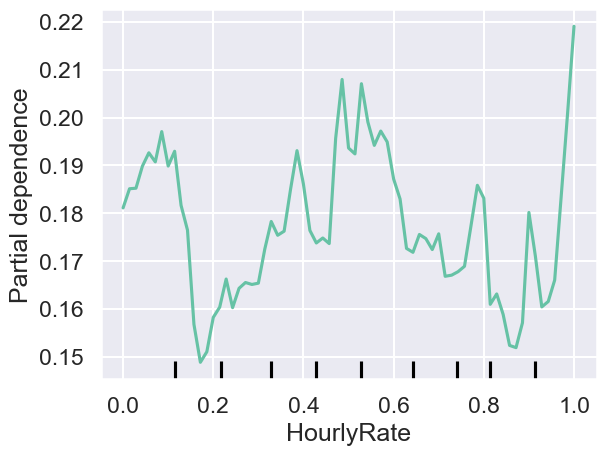

In [38]:
var = 'HourlyRate'
PartialDependenceDisplay.from_estimator(rf_pdp, X_train_top5, [var]);

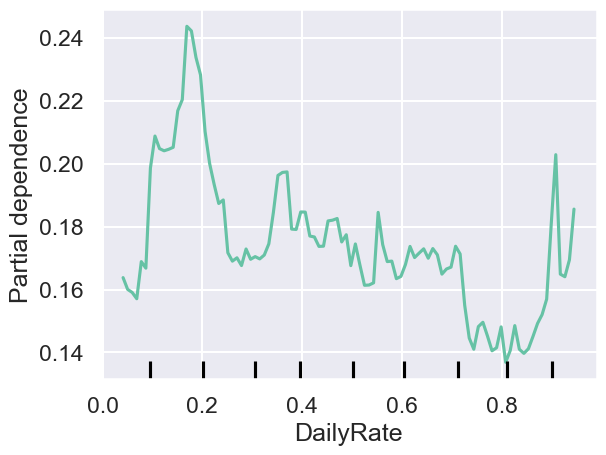

In [39]:
var = 'DailyRate'
PartialDependenceDisplay.from_estimator(rf_pdp, X_train_top5, [var]);

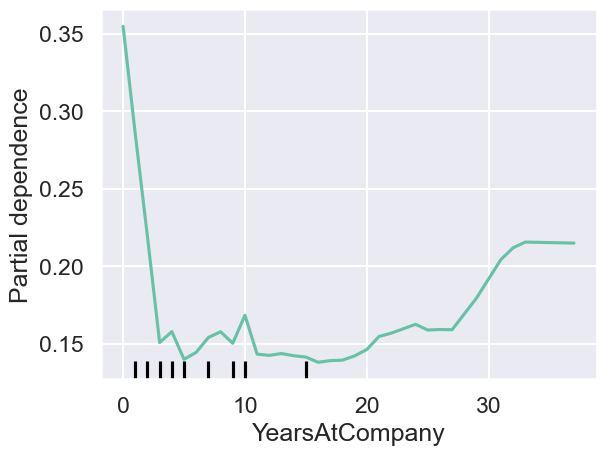

In [40]:
var = 'YearsAtCompany'
PartialDependenceDisplay.from_estimator(rf_pdp, X_train_top5, [var]);

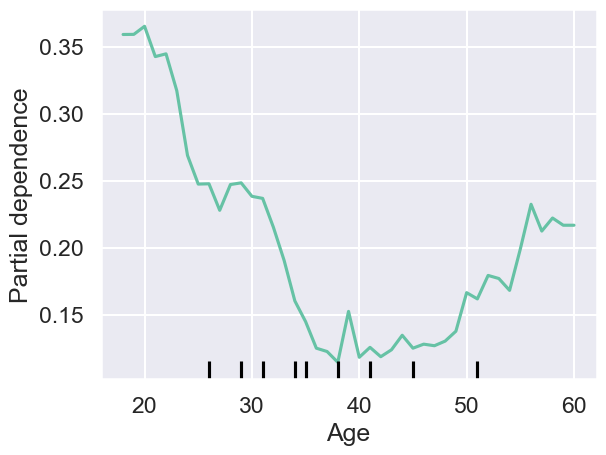

In [41]:
var = 'Age'
PartialDependenceDisplay.from_estimator(rf_pdp, X_train_top5, [var]);

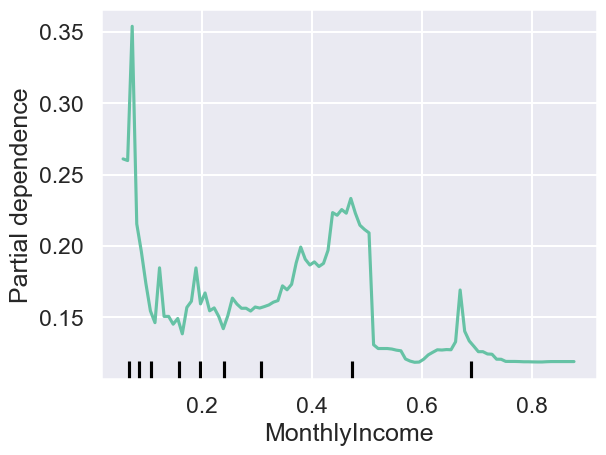

In [42]:
var = 'MonthlyIncome'
PartialDependenceDisplay.from_estimator(rf_pdp, X_train_top5, [var]);